# Customer Churn Analysis

#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.  

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.  

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.   

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.  

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_cc=pd.read_csv("Telecom_customer_churn.csv")
pd.set_option('display.max_columns',None)
df_cc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# First 10 rows
df_cc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Last 10 rows
df_cc.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Sample
df_cc.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4263,2121-JAFOM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.55,8312.4,No
6588,3389-KTRXV,Female,0,Yes,Yes,23,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,23.85,625.65,No
2226,3298-QEICA,Female,0,Yes,Yes,23,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Mailed check,34.60,813.45,No
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes


In [6]:
df_cc.shape

(7043, 21)

This dataset contains `7043` rows and `21` columns.

# Preprocessing & EDA

In [7]:
# Column Names
df_cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Dataset shape
df_cc.shape

(7043, 21)

In [9]:
# Column Data Types
df_cc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In the dataset, data types are object, float and int. Upon inspection `TotalCharges` is a object data type but it must be float data type, let us change the data type.

In [10]:
# Converting TotalCharges from object to float data type 
df_cc["TotalCharges"]=df_cc["TotalCharges"].str.strip()
df_cc["TotalCharges"]=pd.to_numeric(df_cc["TotalCharges"])

In [11]:
# Checking for null values
df_cc.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Checking for null values
df_cc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there are 11 null values present in TotalCharges.

<AxesSubplot:>

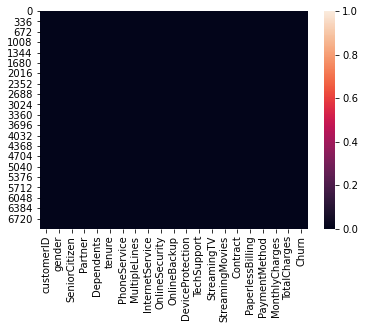

In [13]:
# Visualizing the null values
sns.heatmap(df_cc.isnull())

# Treating Null Values

We shall treat the null values in the TotalCharges column using the Mean method as the data is numerical.

In [14]:
df_cc['TotalCharges'].mean()

2283.3004408418697

In [15]:
# Filling missing values in TotalCharges using mean
df_cc["TotalCharges"] = df_cc["TotalCharges"].fillna(round(df_cc["TotalCharges"].mean(),2))

In [16]:
df_cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df_cc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300440
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
# Mean of our target variable 'Churn'
df_cc.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2554.765771
Yes,0.254682,17.979133,74.441332,1531.796094


In [19]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
# Checking unique values of each column
df_cc.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

customerID column all the values are unique, it wont be helpful with our model training, so let us drop this column.

In [21]:
# Droping customer ID column
df_cc = df_cc.drop(["customerID"],axis=1)

In [22]:
# Value counts of each column.
for i in df_cc.columns:
        print(df_cc[i].value_counts())
        print('-----------------------------------------------------')

Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-----------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-----------------------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype:

In [23]:
# Unique values of target variable column
df_cc['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
# Checking for any empty observation in target column
df_cc.loc[df_cc['Churn'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No empty observations.

In [25]:
df_cc['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization

# Univariate Analysis

In [26]:
df_cc.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

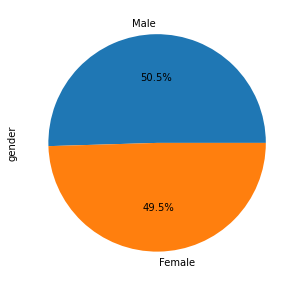

In [27]:
plt.figure(figsize=(8,5))
print(df_cc['gender'].value_counts())
df_cc['gender'].value_counts().plot.pie(autopct='%1.1f%%')

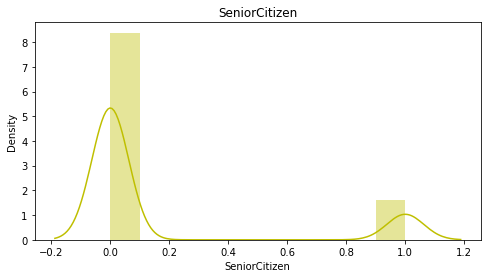

In [28]:
plt.figure(figsize = (8, 4))
sns.distplot(df_cc["SeniorCitizen"], bins = 10, color="y")
plt.title("SeniorCitizen")
plt.show()

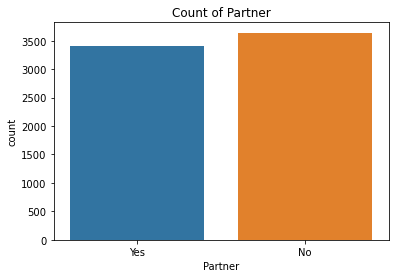

In [29]:
plt.figure()
sns.countplot(df_cc["Partner"])
plt.title("Count of Partner")
plt.show()

No     4933
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:ylabel='Dependents'>

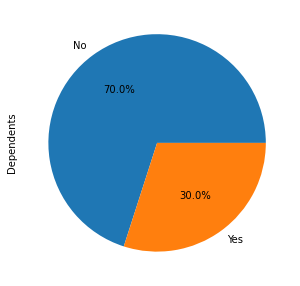

In [30]:
plt.figure(figsize=(8,5))
print(df_cc['Dependents'].value_counts())
df_cc['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')

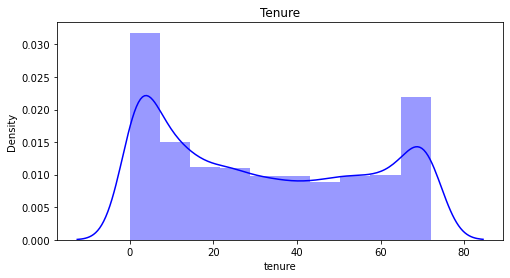

In [31]:
plt.figure(figsize = (8, 4))
sns.distplot(df_cc["tenure"], bins = 10, color="b")
plt.title("Tenure")
plt.show()

Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:ylabel='PhoneService'>

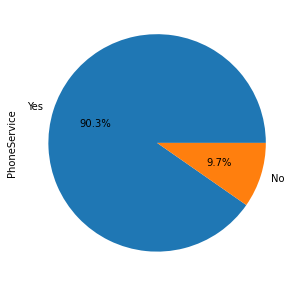

In [32]:
plt.figure(figsize=(8,5))
print(df_cc['PhoneService'].value_counts())
df_cc['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%')

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:ylabel='MultipleLines'>

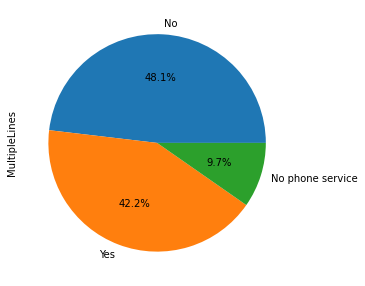

In [33]:
plt.figure(figsize=(8,5))
print(df_cc['MultipleLines'].value_counts())
df_cc['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%')

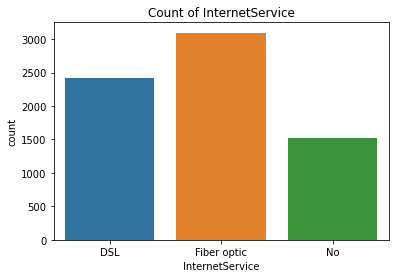

In [34]:
plt.figure()
sns.countplot(df_cc["InternetService"])
plt.title("Count of InternetService")
plt.show()

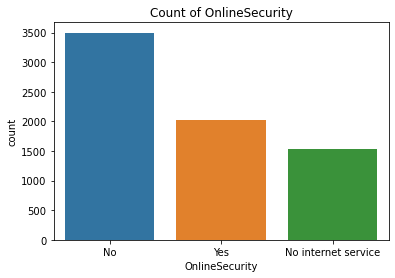

In [35]:
plt.figure()
sns.countplot(df_cc["OnlineSecurity"])
plt.title("Count of OnlineSecurity")
plt.show()

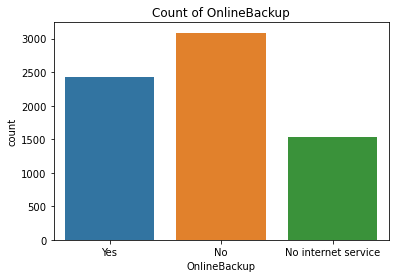

In [36]:
plt.figure()
sns.countplot(df_cc["OnlineBackup"])
plt.title("Count of OnlineBackup")
plt.show()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


<AxesSubplot:ylabel='DeviceProtection'>

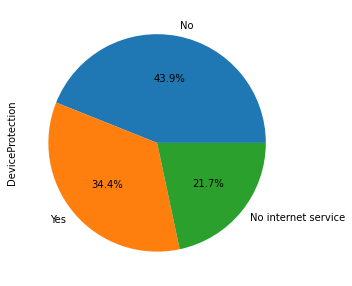

In [37]:
plt.figure(figsize=(8,5))
print(df_cc['DeviceProtection'].value_counts())
df_cc['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%')

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


<AxesSubplot:ylabel='TechSupport'>

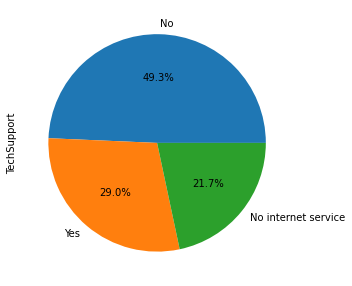

In [38]:
plt.figure(figsize=(8,5))
print(df_cc['TechSupport'].value_counts())
df_cc['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%')

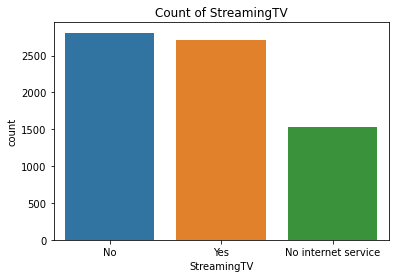

In [39]:
plt.figure()
sns.countplot(df_cc["StreamingTV"])
plt.title("Count of StreamingTV")
plt.show()

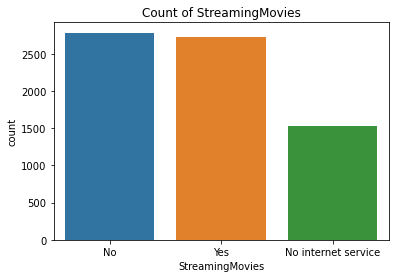

In [40]:
plt.figure()
sns.countplot(df_cc["StreamingMovies"])
plt.title("Count of StreamingMovies")
plt.show()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:ylabel='Contract'>

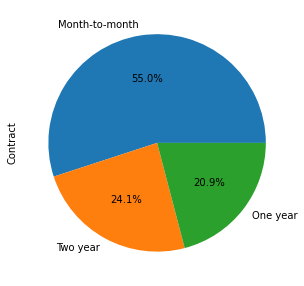

In [41]:
plt.figure(figsize=(8,5))
print(df_cc['Contract'].value_counts())
df_cc['Contract'].value_counts().plot.pie(autopct='%1.1f%%')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


<AxesSubplot:ylabel='PaperlessBilling'>

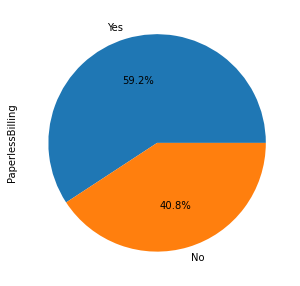

In [42]:
plt.figure(figsize=(8,5))
print(df_cc['PaperlessBilling'].value_counts())
df_cc['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%')

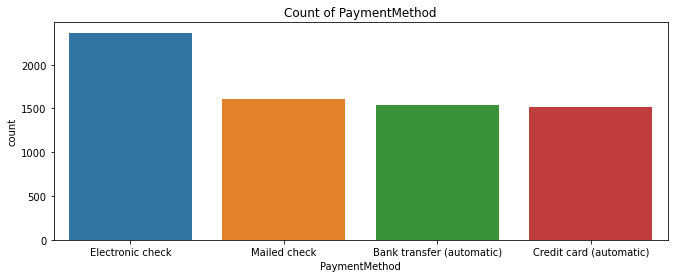

In [43]:
plt.figure(figsize=(11,4))
sns.countplot(df_cc["PaymentMethod"])
plt.title("Count of PaymentMethod")
plt.show()

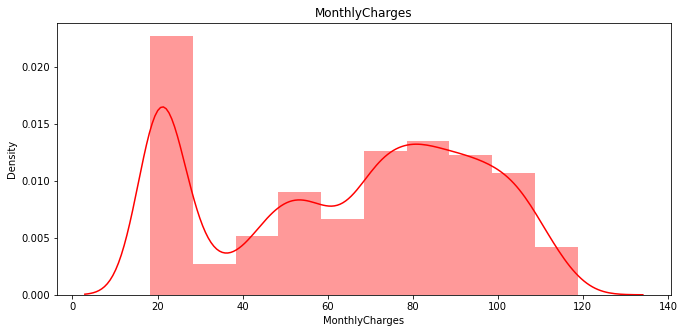

In [44]:
plt.figure(figsize = (11, 5))
sns.distplot(df_cc["MonthlyCharges"], bins = 10, color="r")
plt.title("MonthlyCharges")
plt.show()

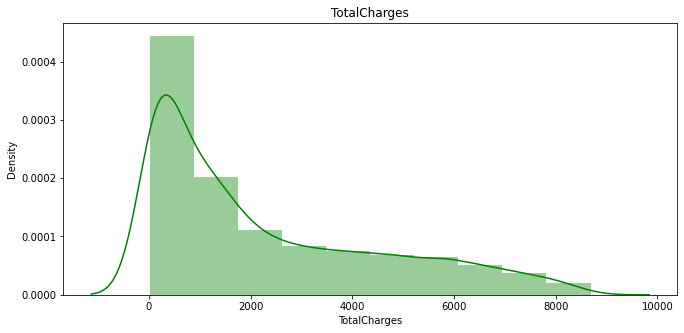

In [45]:
plt.figure(figsize = (11, 5))
sns.distplot(df_cc["TotalCharges"], bins = 10, color="g")
plt.title("TotalCharges")
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:ylabel='Churn'>

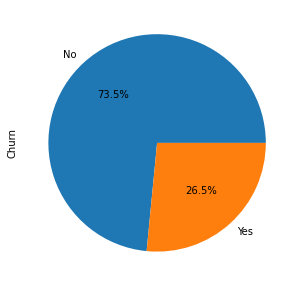

In [46]:
plt.figure(figsize=(8,5))
print(df_cc['Churn'].value_counts())
df_cc['Churn'].value_counts().plot.pie(autopct='%1.1f%%')

# Bivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

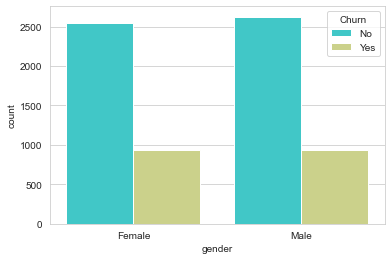

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='gender',hue='Churn',data=df_cc,palette='rainbow')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

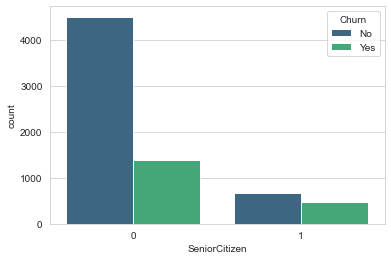

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='SeniorCitizen',hue='Churn',data=df_cc,palette='viridis')

<AxesSubplot:xlabel='Partner', ylabel='count'>

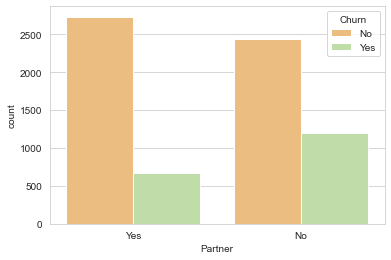

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Partner',hue='Churn',data=df_cc,palette='Spectral')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

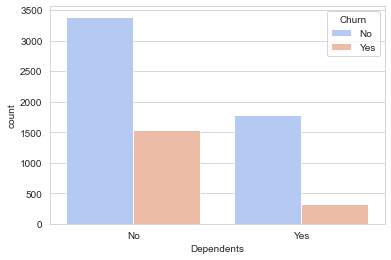

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Churn',data=df_cc,palette='coolwarm')

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

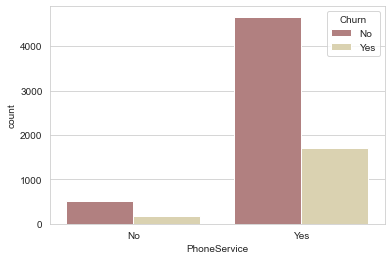

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='PhoneService',hue='Churn',data=df_cc,palette='pink')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

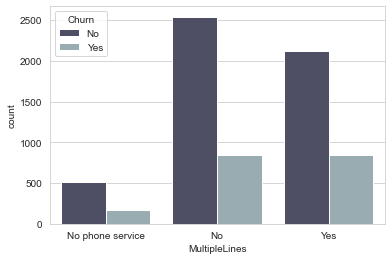

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='MultipleLines',hue='Churn',data=df_cc,palette='bone')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

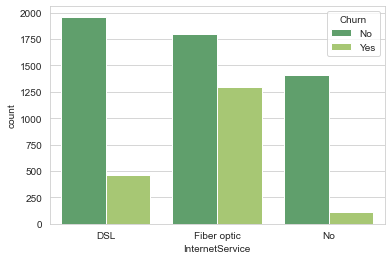

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='InternetService',hue='Churn',data=df_cc,palette='summer')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

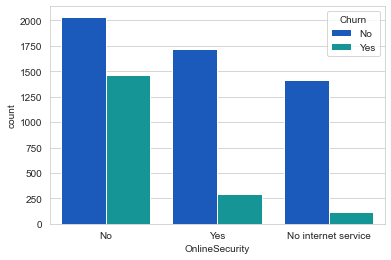

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineSecurity',hue='Churn',data=df_cc,palette='winter')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

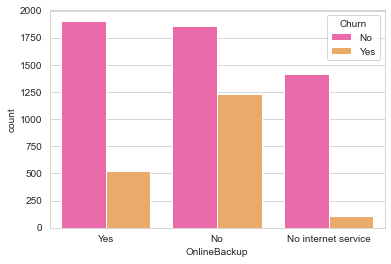

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineBackup',hue='Churn',data=df_cc,palette='spring')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

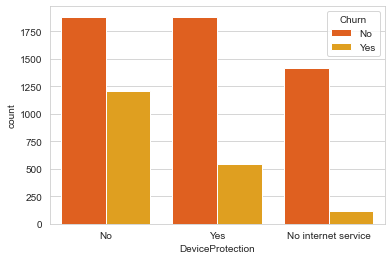

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='DeviceProtection',hue='Churn',data=df_cc,palette='autumn')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

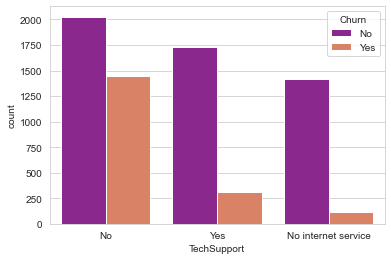

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='TechSupport',hue='Churn',data=df_cc,palette='plasma')

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

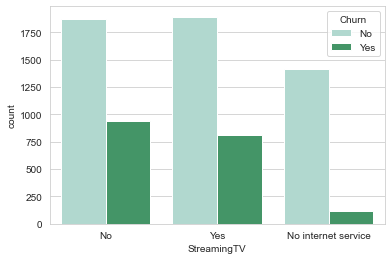

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='StreamingTV',hue='Churn',data=df_cc,palette='BuGn')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

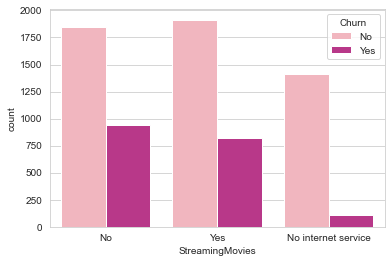

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='StreamingMovies',hue='Churn',data=df_cc,palette='RdPu')

<AxesSubplot:xlabel='Contract', ylabel='count'>

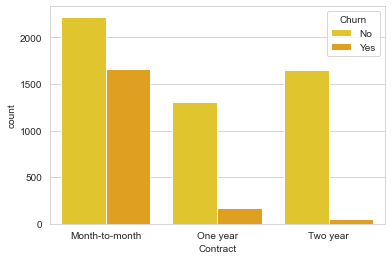

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='Contract',hue='Churn',data=df_cc,palette='Wistia')

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

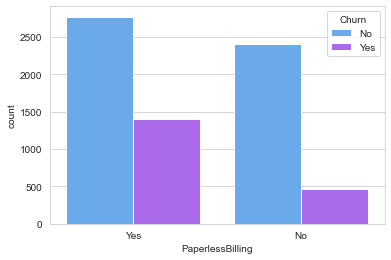

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='PaperlessBilling',hue='Churn',data=df_cc,palette='cool')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

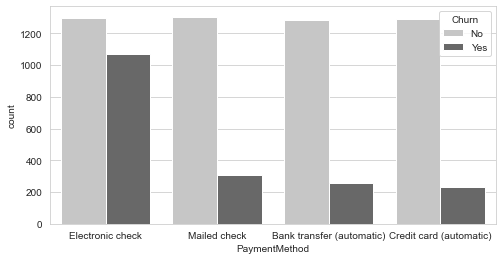

In [62]:
plt.figure(figsize=[8,4])
sns.set_style('whitegrid')
sns.countplot(x='PaymentMethod',hue='Churn',data=df_cc,palette='Greys')

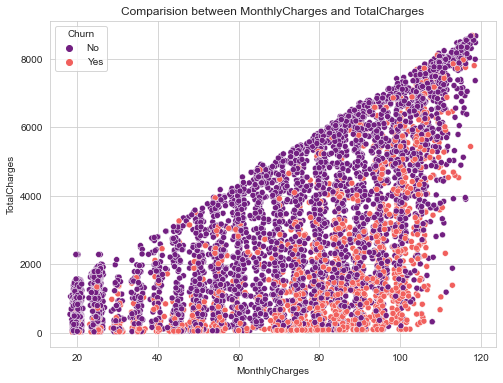

In [63]:
plt.figure(figsize=[8,6])
plt.title('Comparision between MonthlyCharges and TotalCharges')
sns.scatterplot(df_cc['MonthlyCharges'],df_cc['TotalCharges'],hue=df_cc['Churn'],palette="magma");

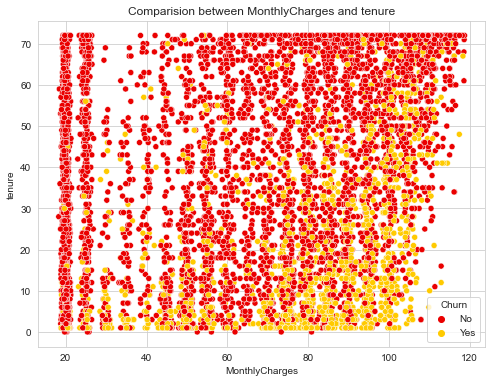

In [64]:
plt.figure(figsize=[8,6])
plt.title('Comparision between MonthlyCharges and tenure')
sns.scatterplot(df_cc['MonthlyCharges'],df_cc['tenure'],hue=df_cc['Churn'],palette="hot");

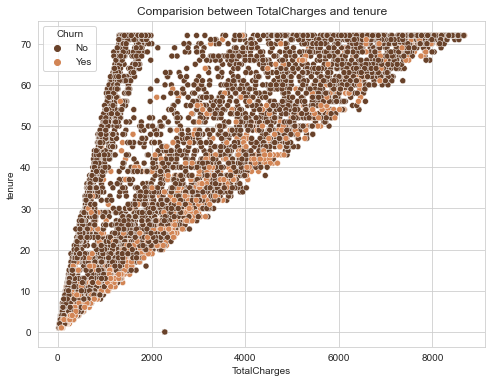

In [65]:
plt.figure(figsize=[8,6])
plt.title('Comparision between TotalCharges and tenure')
sns.scatterplot(df_cc['TotalCharges'],df_cc['tenure'],hue=df_cc['Churn'],palette="copper");

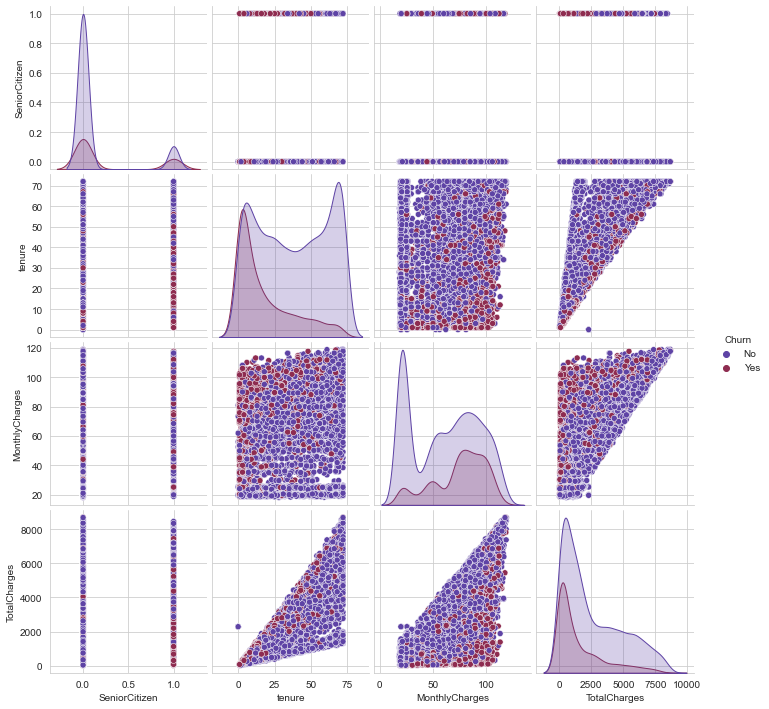

In [66]:
sns.pairplot(df_cc,hue="Churn",palette="twilight")
plt.show()

# Encoding the Data Frame

In [67]:
df_cc.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
df_cc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Label Encoder is used to encode the Data Frame.

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [70]:
df_cc['gender'] = le.fit_transform(df_cc['gender'])
df_cc['Partner'] = le.fit_transform(df_cc['Partner'])
df_cc['Dependents'] = le.fit_transform(df_cc['Dependents'])
df_cc['PhoneService'] = le.fit_transform(df_cc['PhoneService'])
df_cc['MultipleLines'] = le.fit_transform(df_cc['MultipleLines'])
df_cc['InternetService'] = le.fit_transform(df_cc['InternetService'])
df_cc['OnlineSecurity'] = le.fit_transform(df_cc['OnlineSecurity'])
df_cc['OnlineBackup'] = le.fit_transform(df_cc['OnlineBackup'])
df_cc['DeviceProtection'] = le.fit_transform(df_cc['DeviceProtection'])
df_cc['TechSupport'] = le.fit_transform(df_cc['TechSupport'])
df_cc['StreamingTV'] = le.fit_transform(df_cc['StreamingTV'])
df_cc['StreamingMovies'] = le.fit_transform(df_cc['StreamingMovies'])
df_cc['Contract'] = le.fit_transform(df_cc['Contract'])
df_cc['PaperlessBilling'] = le.fit_transform(df_cc['PaperlessBilling'])
df_cc['PaymentMethod'] = le.fit_transform(df_cc['PaymentMethod'])
df_cc['Churn'] = le.fit_transform(df_cc['Churn'])

In [71]:
df_cc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Outliers

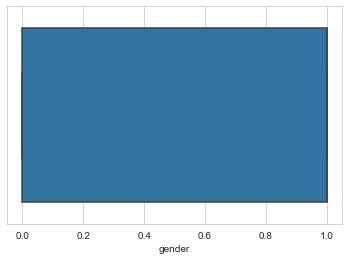

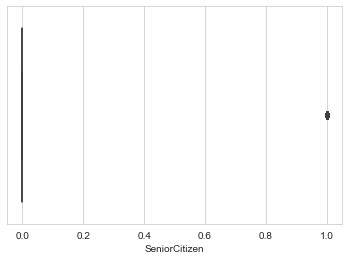

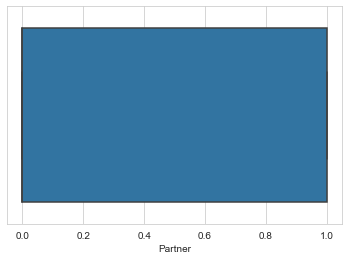

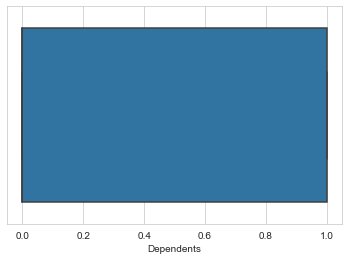

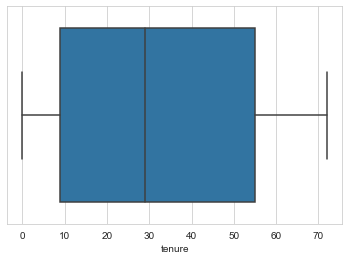

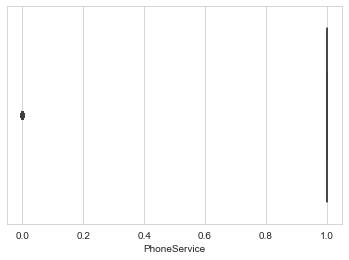

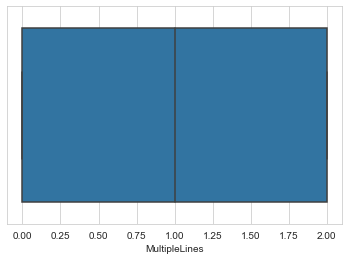

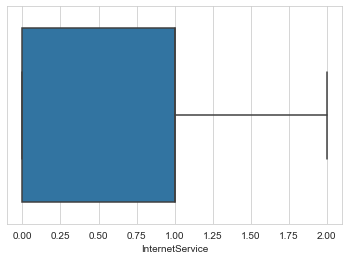

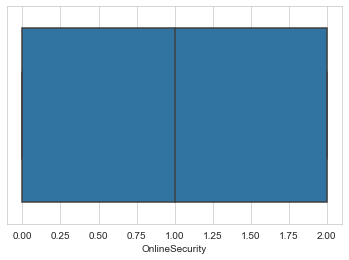

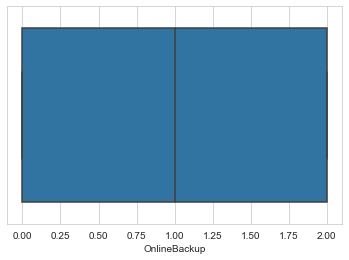

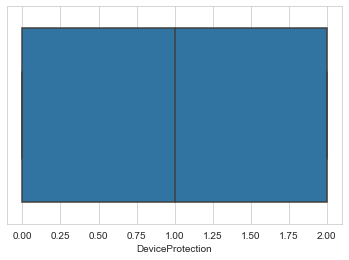

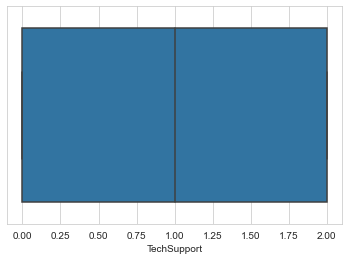

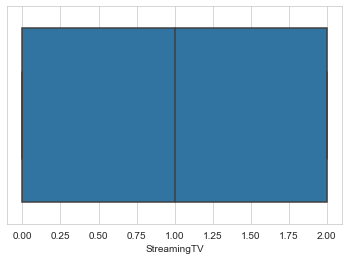

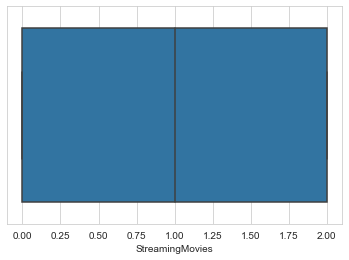

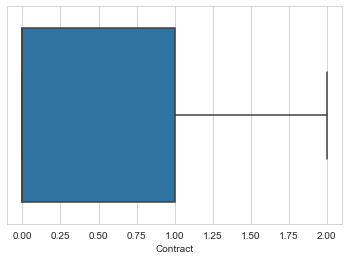

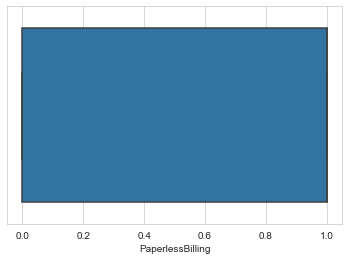

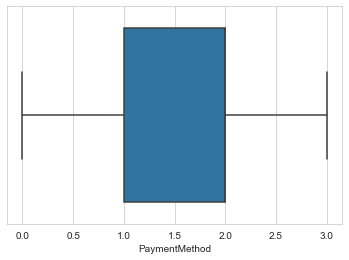

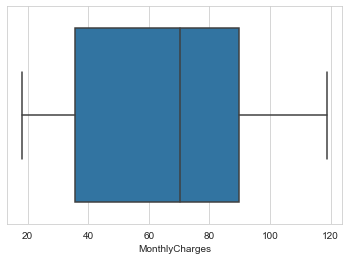

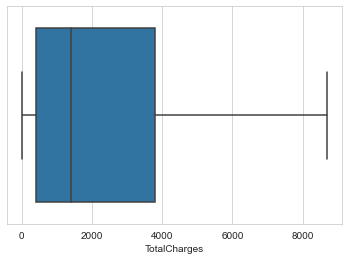

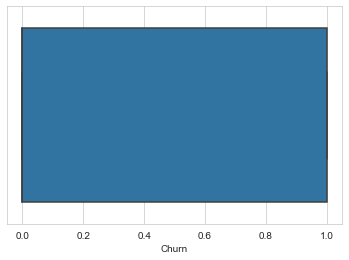

In [72]:
for i in df_cc.columns:
    sns.boxplot(df_cc[i])
    plt.show()

gender                 AxesSubplot(0.125,0.536818;0.0596154x0.343182)
SeniorCitizen       AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
Partner             AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
Dependents          AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
tenure              AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
PhoneService        AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
MultipleLines       AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
InternetService     AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
OnlineSecurity      AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
OnlineBackup        AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
DeviceProtection    AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
TechSupport               AxesSubplot(0.125,0.125;0.0596154x0.343182)
StreamingTV            AxesSubplot(0.196538,0.125;0.0596154x0.343182)
StreamingMovies        AxesSubplot(0.268077,0.125;0.0596154x0.343182)
Contract            

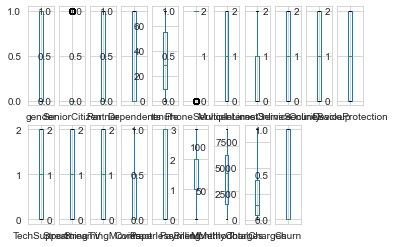

In [73]:
df_cc.plot(kind='box',subplots=True,layout=(2,11))

We can see a few outliers present in `SeniorCitizen` & `PhoneService`. Since, they both are categorical columns and the number of outliers is quite less, we will let them be. 

# Skewness

In [74]:
df_cc.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

We can see high skewness in `'SeniorCitizen','Dependents','PhoneService','TechSupport','OnlineSecurity','Contract', 'PaperlessBilling' & 'TotalCharges'`.

In [75]:
df_skew=["SeniorCitizen","Dependents","PhoneService","Contract","OnlineSecurity","TotalCharges"]

We shall use Power Transformer to remove skewness.

In [76]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [77]:
df_cc[df_skew] = scal.fit_transform(df_cc[df_skew].values)

In [78]:
df_cc[df_skew].skew()

SeniorCitizen     1.833633
Dependents        0.875199
PhoneService     -2.727153
Contract          0.302174
OnlineSecurity    0.149362
TotalCharges     -0.144899
dtype: float64

Skewness is reduced.

In [79]:
df_cc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.439916,1,-0.654012,1,-3.054010,1,0,-0.977199,2,0,0,0,0,-0.888524,1,2,29.85,-1.810588,0
1,1,-0.439916,0,-0.654012,34,0.327438,0,0,1.258702,0,2,0,0,0,0.790424,0,3,56.95,0.253313,0
2,1,-0.439916,0,-0.654012,2,0.327438,0,0,1.258702,2,0,0,0,0,-0.888524,1,3,53.85,-1.387269,1
3,1,-0.439916,0,-0.654012,45,-3.054010,1,0,1.258702,0,2,2,0,0,0.790424,0,0,42.30,0.232253,0
4,0,-0.439916,0,-0.654012,2,0.327438,0,1,-0.977199,0,0,0,0,0,-0.888524,1,2,70.70,-1.250118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.439916,1,1.529024,24,0.327438,2,0,1.258702,0,2,2,2,2,0.790424,1,3,84.80,0.295688,0
7039,0,-0.439916,1,1.529024,72,0.327438,2,1,-0.977199,2,2,0,2,2,0.790424,1,1,103.20,1.567096,0
7040,0,-0.439916,1,1.529024,11,-3.054010,1,0,1.258702,0,0,0,0,0,-0.888524,1,2,29.60,-0.859899,0
7041,1,2.273159,1,-0.654012,4,0.327438,2,1,-0.977199,0,0,0,0,0,-0.888524,1,3,74.40,-0.922968,1


# Correlation

In [80]:
df_cc.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.013357,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.001953,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.155913,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.143270,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.145086,0.153130,0.166330,0.126733,0.137341,0.129574,0.293339,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.171255,0.091015,0.080537,0.133524,0.046885,0.021321,0.241995,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.305857,0.370876,0.371105,0.322942,0.289373,0.296866,0.671462,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,0.016175,0.024105,0.003727,-0.019158,0.055353,0.043870,0.001453,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,-0.041931,0.117327,0.122318,0.011466,0.175059,0.180957,0.102466,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,0.116314,0.036138,0.044944,-0.026047,0.107417,0.098350,0.090782,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.013357,-0.155913,0.145086,0.171255,0.305857,0.016175,-0.041931,0.116314,1.000000,0.187938,0.179367,0.296111,0.044490,0.054582,0.404034,-0.208908,-0.070155,-0.188279,0.165064,-0.318821
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.187938,1.000000,0.187757,0.195748,0.147186,0.136722,0.286290,-0.013370,-0.124847,0.119777,0.344209,-0.195525


In [81]:
df_cc.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.237089
TechSupport        -0.282492
OnlineSecurity     -0.318821
tenure             -0.352229
Contract           -0.409933
Name: Churn, dtype: float64

<AxesSubplot:>

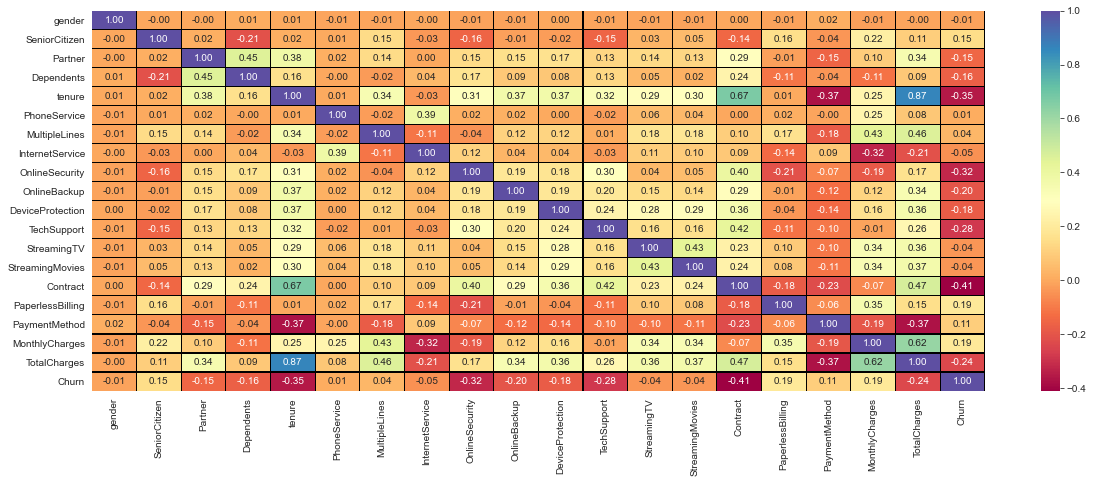

In [82]:
# Visualizing df_cc.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_cc.corr(),annot=True,cmap="Spectral",linewidths=0.1,linecolor="black",fmt=".2f")

From the above correlation map we see that, `MonthlyCharges, PaymentMethod & PaperlessBilling` are all highly positively correlated with our target variable `Churn`. The columns `Contract, tenure, OnlineSecurity, TechSupport, TotalCharges & OnlineBackup`are highly negatively correlated with our target variable.

Also, the columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other.

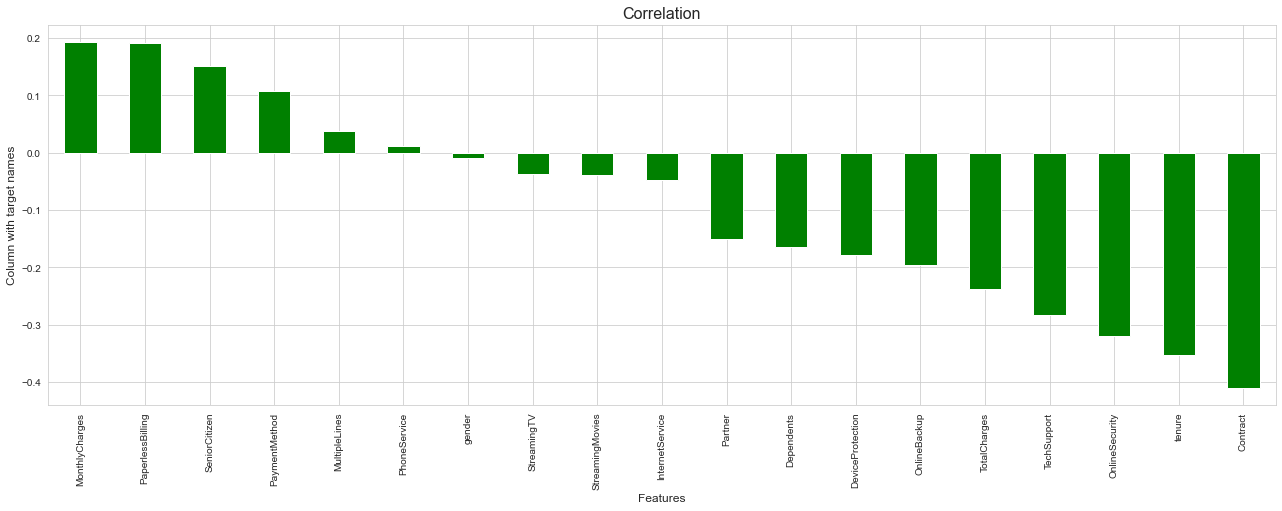

In [83]:
plt.figure(figsize=(22,7))
df_cc.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

`Gender and PhoneService` are very less correlation with target variable `Churn`.

# Model Building

In [84]:
x = df_cc.drop("Churn",axis=1)
y = df_cc["Churn"]

In [85]:
x.shape

(7043, 19)

In [86]:
y.shape

(7043,)

# Scaling

In [87]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.977199,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.888524,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.258702,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.790424,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.258702,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.888524,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.258702,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.790424,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.977199,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.888524,0.829798,0.398558,0.197365,-1.250118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.258702,-1.029919,1.245111,1.396299,1.146547,1.138411,0.790424,0.829798,1.334863,0.665992,0.295688
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.977199,1.242550,1.245111,-0.925262,1.146547,1.138411,0.790424,0.829798,-0.537747,1.277533,1.567096
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.258702,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.888524,0.829798,0.398558,-1.168632,-0.859899
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.977199,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.888524,0.829798,1.334863,0.320338,-0.922968


# VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,gender,1.001655
1,SeniorCitizen,1.150053
2,Partner,1.462857
3,Dependents,1.383567
4,tenure,10.188284
5,PhoneService,1.626335
6,MultipleLines,1.396288
7,InternetService,1.860318
8,OnlineSecurity,1.327835
9,OnlineBackup,1.190624


By checking VIF value we can find the features which causing multicollinearity. Here we can find the feature `TotalCharges and tenure` have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the columns first, if the same issue exists then we will drop another to remove the multicollinearity.

In [89]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,gender,1.001655
1,SeniorCitizen,1.149832
2,Partner,1.460788
3,Dependents,1.381927
4,tenure,2.747176
5,PhoneService,1.626333
6,MultipleLines,1.390997
7,InternetService,1.818283
8,OnlineSecurity,1.324108
9,OnlineBackup,1.187967


Now all the VIF values are within 10.

# SMOTE

In [91]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [92]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

In [93]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

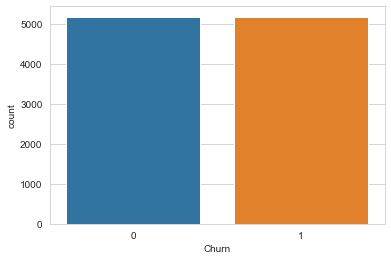

In [94]:
# Visualizing the data after oversampling
sns.countplot(y)

We have balanced the data using SMOTE.

# Best Random State

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [96]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.792914653784219  on Random State : 59


In [97]:
# dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [98]:
x_train.shape

(7243, 18)

In [99]:
y_train.shape

(7243,)

In [100]:
x_test.shape

(3105, 18)

In [101]:
y_test.shape

(3105,)

In [102]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [104]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.7925925925925926
[[1161  371]
 [ 273 1300]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1532
           1       0.78      0.83      0.80      1573

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.6721417069243156
[[ 700  832]
 [ 186 1387]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58      1532
           1       0.63      0.88      0.73      1573

    accuracy                           0.67      3105
   macro avg       0.71      0.67      0.66      3105
weighted avg       0.71      0.67      0.66      3105



# KNearest Neighbors Classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.7922705314009661
[[1047  485]
 [ 160 1413]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1532
           1       0.74      0.90      0.81      1573

    accuracy                           0.79      3105
   macro avg       0.81      0.79      0.79      3105
weighted avg       0.81      0.79      0.79      3105



# GaussianNB Classifier

In [109]:
from sklearn.naive_bayes import GaussianNB

In [110]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
pred_gnb=gnb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

accuracy score:  0.780354267310789
[[1145  387]
 [ 295 1278]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1532
           1       0.77      0.81      0.79      1573

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



# SVC

In [111]:
from sklearn.svm import SVC

In [112]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.8193236714975846
[[1195  337]
 [ 224 1349]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1532
           1       0.80      0.86      0.83      1573

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



# Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8016103059581321
[[1002  530]
 [  86 1487]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1532
           1       0.74      0.95      0.83      1573

    accuracy                           0.80      3105
   macro avg       0.83      0.80      0.80      3105
weighted avg       0.83      0.80      0.80      3105



# AdaBoost Classifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
pred_abc = abc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test, pred_abc))
print(confusion_matrix(y_test, pred_abc))
print(classification_report(y_test,pred_abc))

accuracy score:  0.6991948470209339
[[ 642  890]
 [  44 1529]]
              precision    recall  f1-score   support

           0       0.94      0.42      0.58      1532
           1       0.63      0.97      0.77      1573

    accuracy                           0.70      3105
   macro avg       0.78      0.70      0.67      3105
weighted avg       0.78      0.70      0.67      3105



# Gradient Boosting CLassifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred_gcb=gbc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gcb))
print(confusion_matrix(y_test,pred_gcb))
print(classification_report(y_test,pred_gcb))

accuracy score:  0.5230273752012883
[[  53 1479]
 [   2 1571]]
              precision    recall  f1-score   support

           0       0.96      0.03      0.07      1532
           1       0.52      1.00      0.68      1573

    accuracy                           0.52      3105
   macro avg       0.74      0.52      0.37      3105
weighted avg       0.74      0.52      0.38      3105



From the above classification models, the highest Accuracy score belongs to `SVC Model`, followed by `Random Forest Classifier`,`Logistic Regression Model` & `KNearest Neighbors Classifier`.

Next, `GaussianNB Classifier`, then `AdaBoost Classifier & Decision Tree Classifier`.

The lowest Accuracy score belongs to `Gradient Boosting Classifier`.

# Cross Validation Score

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7732921456139983


In [121]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7830593789620414


In [122]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.7893338750312293


In [123]:
scr_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.7652703469434929


In [124]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.8046047590028088


In [125]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.8549580534366295


In [126]:
scr_abc=cross_val_score(abc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_abc.mean())

Cross validation score of this model is:  0.8097277267601095


In [127]:
scr_gbc=cross_val_score(gbc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.8335037346801064


The highest cross validation score belongs to `Random Forest Classifier`. Next, `Gradient Boosting Classifier, AdaBoost Classifier & SVC`. Next `KNearest Neighbors Classifier, Decision Tree Classifier,Logistic Regression Model` & finally, `GaussianNB Classifier`.

# Hyper Parameter Tuning

Since, there is the least amount of difference between the Cross Validation score and the Accuracy score of `SVC Model`, we shall consider it for hyper parameter tuning. We shall use GridSearchCV for Hyper Parameter Tuning.

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
parameters={
    'C': [0.5,1.0,2.0],
    'kernel': ['linear', 'poly','rbf'],
    'gamma':['scale','auto'],
    'degree': [1,2,3,4],
    'coef0':[0.0,0.1,0.2,0.3]}
grid_svc = GridSearchCV(svc, param_grid = parameters, cv = 10)

In [130]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1.0, 2.0], 'coef0': [0.0, 0.1, 0.2, 0.3],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [131]:
grid_svc.best_params_

{'C': 2.0, 'coef0': 0.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [132]:
svc1= SVC(C=2.0,kernel='rbf',degree=1,gamma='scale',coef0=0.0)

svc1.fit(x_train,y_train)
pred_sv1=svc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_sv1))
print(confusion_matrix(y_test,pred_sv1))
print(classification_report(y_test,pred_sv1))

accuracy score:  0.8302737520128824
[[1197  335]
 [ 192 1381]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1532
           1       0.80      0.88      0.84      1573

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



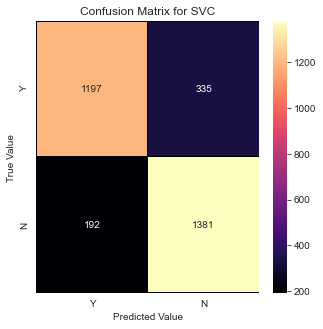

In [133]:
cm = confusion_matrix(y_test, pred_sv1)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="magma",xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for SVC')
plt.show()

# ROC-AUC Curve

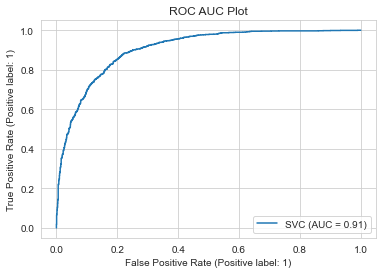

In [134]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

We have plotted the ROC-AUC curve, AUC score is `91 %`.

# Saving the Model

In [135]:
import joblib
joblib.dump(svc1,"Customer_Churn_Analysis_Project.pkl")

['Customer_Churn_Analysis_Project.pkl']

# Prediction

In [136]:
# Loading the saved model
churn_prediction_model=joblib.load("Customer_Churn_Analysis_Project.pkl")

# Prediction
prediction = churn_prediction_model.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 1, 1])

In [137]:
pd.DataFrame([churn_prediction_model.predict(x_test)[:],y_test[:]],index=["Predicted Values","Actual Values"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

The above data frame shows the predicted values and the actual values.They are almost similar.